#GFF plotter

##Helping hands

http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week2/getting_data.ipynb

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb


##Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as plt
#plt.use('TkAgg') 

import operator

import pylab
pylab.show()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##Definitions

In [2]:
fileUrl = "https://dl.dropboxusercontent.com/u/753166/jbrowse/gbrowse_repeats.gff3.Gypsy.gff3"

FULL_FIG_W , FULL_FIG_H  = 16, 8
CHROM_FIG_W, CHROM_FIG_H = FULL_FIG_W, 20

##Setup

###Figure sizes controller

In [3]:
class size_controller(object):
    def __init__(self, w, h):
        self.w = w
        self.h = h
        
    def __enter__(self):
        self.o = rcParams['figure.figsize']
        rcParams['figure.figsize'] = self.w, self.h
        return None
    
    def __exit__(self, type, value, traceback):
        rcParams['figure.figsize'] = self.o

###Column type definition

In [37]:
col_type_int  = np.int64
col_type_flo  = np.float64
col_type_str  = np.str_ #np.object
col_type_char = np.character
col_info =[
    [ "chromosome", col_type_str  ], 
    [ "source"    , col_type_str  ],
    [ "type"      , col_type_str  ],
    [ "start"     , col_type_int  ],
    [ "end"       , col_type_int  ],
    [ "qual"      , col_type_int  ],
    [ "strand"    , col_type_char ],
    [ "frame"     , col_type_char ],
    [ "info"      , col_type_str  ],
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))
col_types


{'chromosome': numpy.string_,
 'end': numpy.int64,
 'frame': numpy.character,
 'info': numpy.string_,
 'qual': numpy.int64,
 'source': numpy.string_,
 'start': numpy.int64,
 'strand': numpy.character,
 'type': numpy.string_}

##Read GFF

###Parse INFO column

In [14]:
info_keys = set()

def filter_conv(fi):
    global info_keys
    vs = []
    for pair in fi.split(";"):
        kv = pair.split("=")
        info_keys.add(kv[0])
        
        if len(kv) == 2:
            #in case of key/value pairs
            vs.append(kv)
        else:
            #in case of flags such as INDEL
            vs.append([kv[0], True])
         
    x = dict(zip([x[0] for x in vs], [x[1] for x in vs]))
    #z = pd.Series(x)
    #print z
    return x

###Read GFF
http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week2/getting_data.ipynb

In [43]:
CONVERTERS = {
    'info': filter_conv
}
SKIP_ROWS = 3
NROWS     = None
#index_col=['chromosome', 'start'], usecols=col_names, 
gffData = pd.read_csv(fileUrl, header=None, names=col_names, dtype=col_types, nrows=NROWS, skiprows=SKIP_ROWS, converters=CONVERTERS, verbose=True, delimiter="\t", comment="#")
print gffData.shape
gffData.head()

Tokenization took: 2320.51 ms
Type conversion took: 689.36 ms
Parser memory cleanup took: 0.04 ms
Tokenization took: 1624.05 ms
Type conversion took: 694.25 ms
Parser memory cleanup took: 0.06 ms
Tokenization took: 1158.00 ms
Type conversion took: 443.16 ms
Parser memory cleanup took: 0.01 ms
(176355, 9)


,chromosome,source,type,start,end,qual,strand,frame,info
0,SL2.50ch12,ITAG_repeats,repeat_region,67121143,67121326,580,-,.,{u'Target': u'LTR_PGSC0003DMS000002542_2160%20...
1,SL2.50ch12,ITAG_repeats,repeat_region,67108101,67108203,589,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...
2,SL2.50ch12,ITAG_repeats,repeat_region,67107057,67107149,609,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...
3,SL2.50ch12,ITAG_repeats,repeat_region,67105653,67105898,341,-,.,{u'Target': u'LTR_PGSC0003DMS000000019_19%2066...
4,SL2.50ch12,ITAG_repeats,repeat_region,67105543,67105602,240,-,.,{u'Target': u'LTR_scaffold03032_723%201973%202...


###Add length column

In [44]:
gffData['length'] = gffData['end'] - gffData['start']
gffData.head()

,chromosome,source,type,start,end,qual,strand,frame,info,length
0,SL2.50ch12,ITAG_repeats,repeat_region,67121143,67121326,580,-,.,{u'Target': u'LTR_PGSC0003DMS000002542_2160%20...,183
1,SL2.50ch12,ITAG_repeats,repeat_region,67108101,67108203,589,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...,102
2,SL2.50ch12,ITAG_repeats,repeat_region,67107057,67107149,609,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...,92
3,SL2.50ch12,ITAG_repeats,repeat_region,67105653,67105898,341,-,.,{u'Target': u'LTR_PGSC0003DMS000000019_19%2066...,245
4,SL2.50ch12,ITAG_repeats,repeat_region,67105543,67105602,240,-,.,{u'Target': u'LTR_scaffold03032_723%201973%202...,59


###Split INFO column

In [45]:
info_keys = list(info_keys)
info_keys.sort()
info_keys


['ID', 'Name', 'Target', 'repeat_class', 'score']

In [ ]:
info_keys_types = {
        'score': col_type_int
    }

In [46]:
def gen_val_extracter(info_keys_g):

    def val_extracter_l(info_row, **kwargs):
        vals       = [None] * len(info_keys_g)

        for k,v in info_row.items():
            if k in info_keys_g:
                vals[info_keys_g.index(k)] = v
            else:
                pass

        return vals

    return val_extracter_l

gffData[info_keys] = gffData['info'].apply(gen_val_extracter(info_keys), axis=1).apply(pd.Series, 1)
gffData.head()

,chromosome,source,type,start,end,qual,strand,frame,info,length,ID,Name,Target,repeat_class,score
0,SL2.50ch12,ITAG_repeats,repeat_region,67121143,67121326,580,-,.,{u'Target': u'LTR_PGSC0003DMS000002542_2160%20...,183,6614999,LTR_PGSC0003DMS000002542_2160,LTR_PGSC0003DMS000002542_2160%203196%203388%20+,LTR%2FGypsy,580
1,SL2.50ch12,ITAG_repeats,repeat_region,67108101,67108203,589,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...,102,6614987,LTR_PGSC0003DMS000001085_1372,LTR_PGSC0003DMS000001085_1372%203560%203661%20+,LTR%2FGypsy,589
2,SL2.50ch12,ITAG_repeats,repeat_region,67107057,67107149,609,-,.,{u'Target': u'LTR_PGSC0003DMS000001085_1372%20...,92,6614984,LTR_PGSC0003DMS000001085_1372,LTR_PGSC0003DMS000001085_1372%204699%204792%20+,LTR%2FGypsy,609
3,SL2.50ch12,ITAG_repeats,repeat_region,67105653,67105898,341,-,.,{u'Target': u'LTR_PGSC0003DMS000000019_19%2066...,245,6614982,LTR_PGSC0003DMS000000019_19,LTR_PGSC0003DMS000000019_19%206616%206866%20+,LTR%2FGypsy,341
4,SL2.50ch12,ITAG_repeats,repeat_region,67105543,67105602,240,-,.,{u'Target': u'LTR_scaffold03032_723%201973%202...,59,6614980,LTR_scaffold03032_723,LTR_scaffold03032_723%201973%202037%20+,LTR%2FGypsy,240


##Good part

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb

http://pandas.pydata.org/pandas-docs/dev/visualization.html

https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/

http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb

http://nbviewer.ipython.org/github/herrfz/dataanalysis/blob/master/week3/exploratory_graphs.ipynb

http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

###Column types

In [47]:
gffData.dtypes

chromosome      object
source          object
type            object
start            int64
end              int64
qual             int64
strand          object
frame           object
info            object
length           int64
ID              object
Name            object
Target          object
repeat_class    object
score           object
dtype: object

###Global statistics

In [48]:
gffData.describe()

,start,end,qual,length
count,176355.000000,176355.000000,176355.000000,176355.000000
mean,31897867.603051,31898868.764736,4621.508435,1001.161685
std,18484097.358214,18484044.657411,7962.155057,1445.242492
min,1.000000,161.000000,225.000000,10.000000
25%,16917515.500000,16918151.000000,534.000000,157.000000
50%,30310731.000000,30312101.000000,1616.000000,437.000000
75%,45811002.500000,45812080.000000,5277.500000,1259.000000
max,98447010.000000,98448739.000000,199163.000000,23666.000000


###List of chromosomes

In [49]:
chromosomes = np.unique(gffData['chromosome'].values)
chromosomes

array(['SL2.50ch00', 'SL2.50ch01', 'SL2.50ch02', 'SL2.50ch03',
       'SL2.50ch04', 'SL2.50ch05', 'SL2.50ch06', 'SL2.50ch07',
       'SL2.50ch08', 'SL2.50ch09', 'SL2.50ch10', 'SL2.50ch11', 'SL2.50ch12'], dtype=object)

###Quality distribution

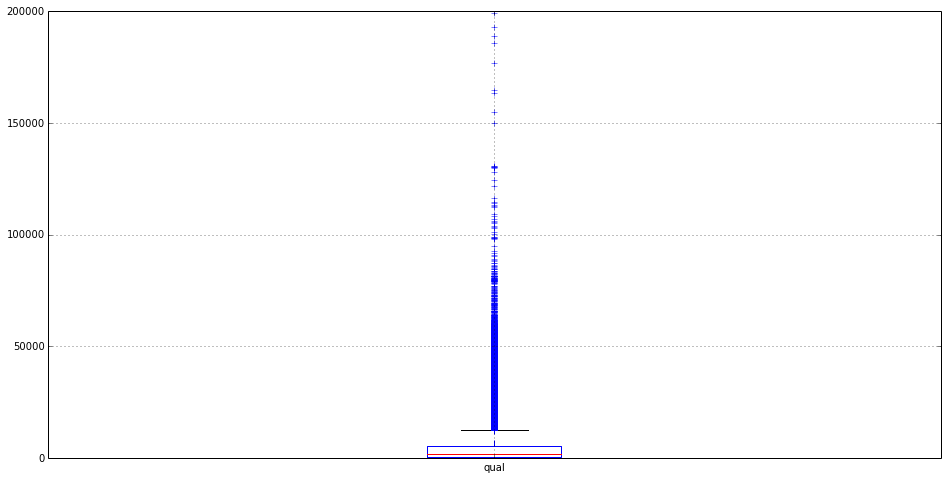

In [50]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bq = gffData.boxplot(column='qual', return_type='dict')

###Quality distribution per chromosome

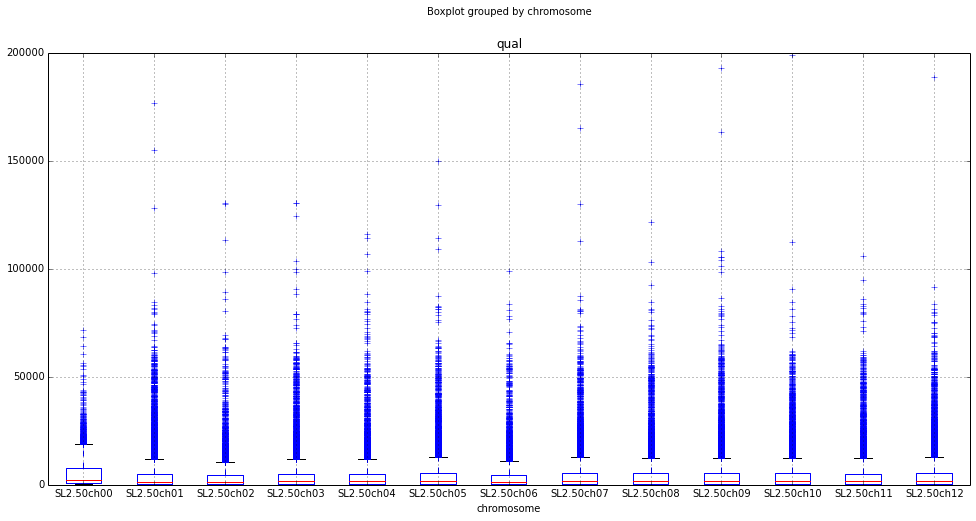

In [51]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = gffData.boxplot(column='qual', by='chromosome', return_type='dict')

###Start position distribution per chromosome

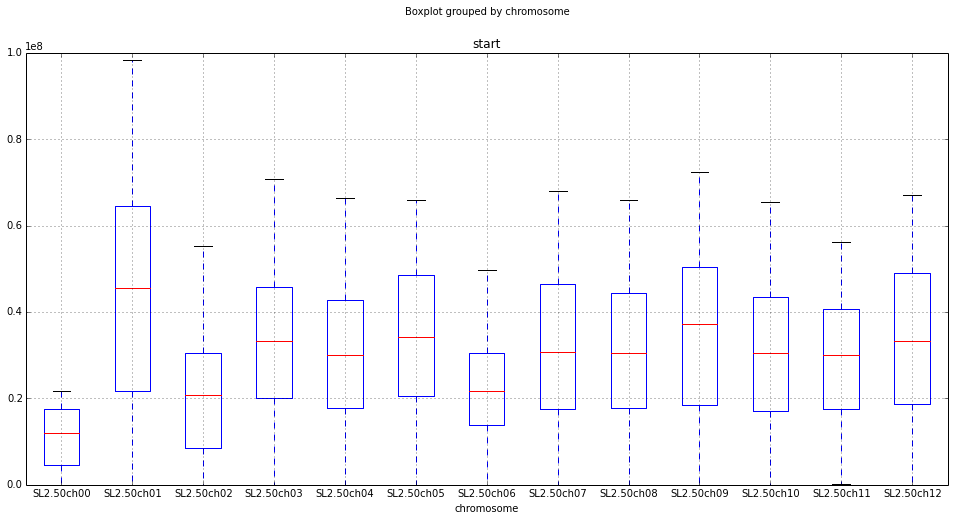

In [52]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = gffData.boxplot(column='start', by='chromosome', return_type='dict')

###Position distribution

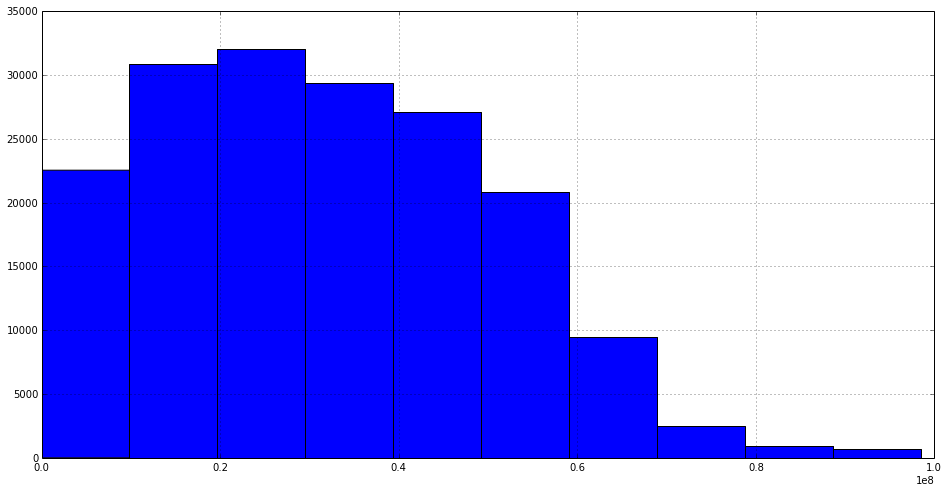

In [53]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    hs = gffData['start'].hist()

###Position distribution per chromosome

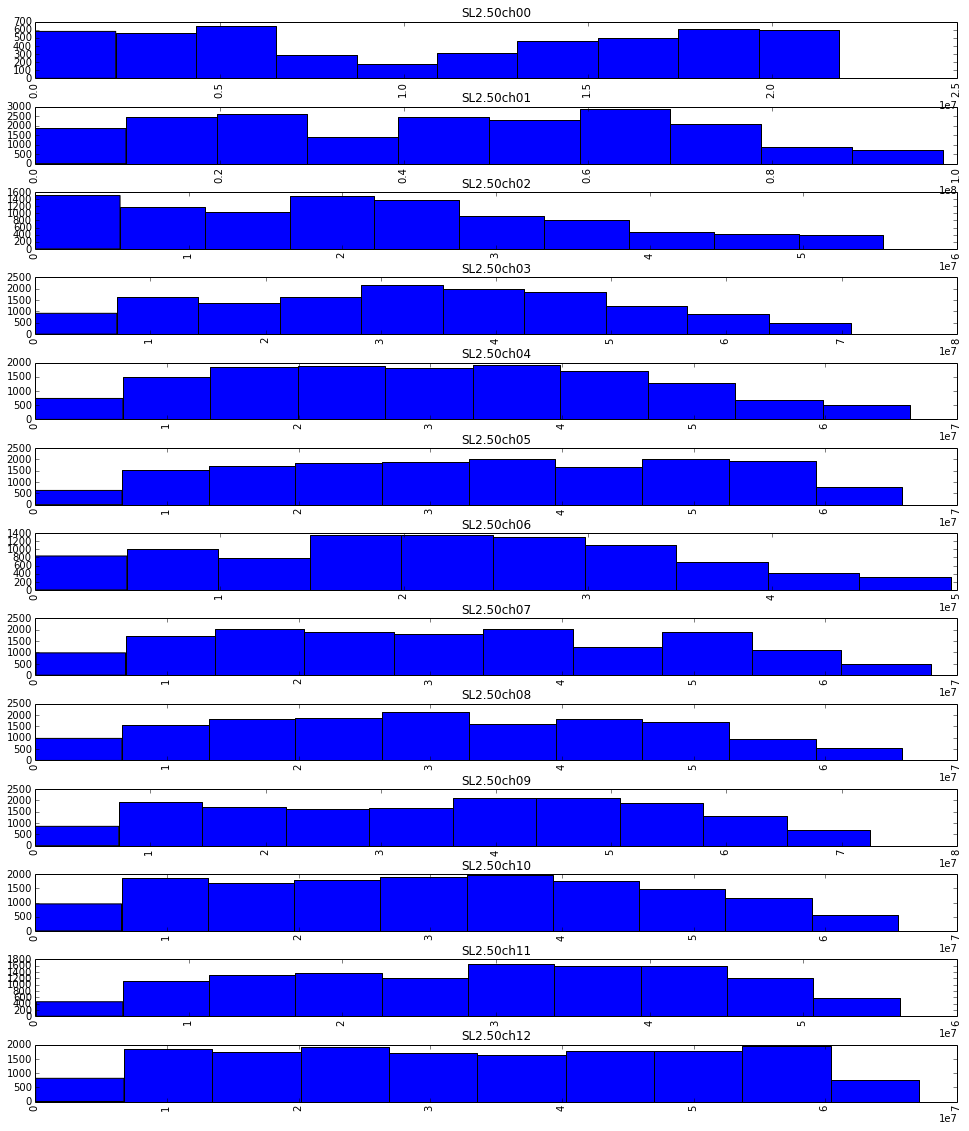

In [54]:
hsc = gffData['start'].hist(by=gffData['chromosome'], figsize=(CHROM_FIG_W, CHROM_FIG_H), layout=(len(chromosomes),1)) 

###Length distribution

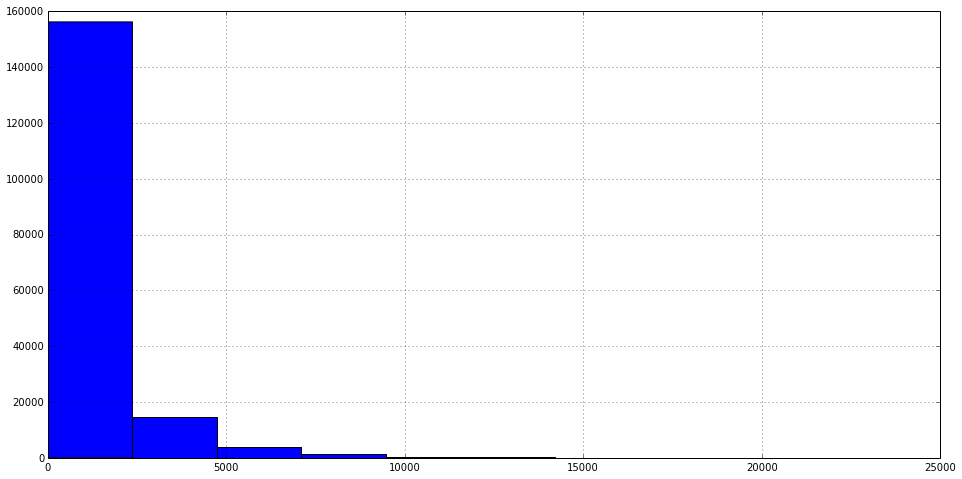

In [55]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    hl = gffData['length'].hist()

###Length distribution per chromosome

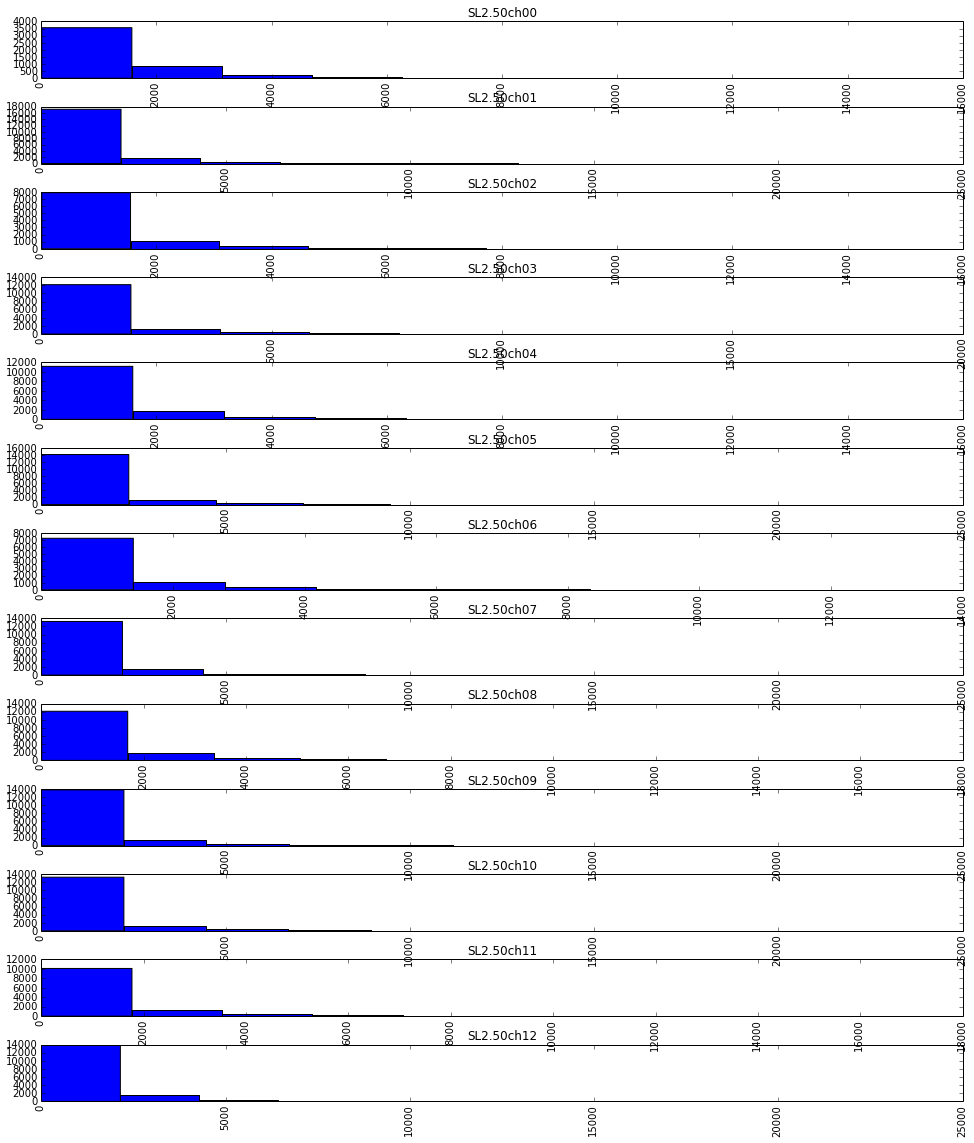

In [56]:
hlc = gffData['length'].hist(by=gffData['chromosome'], figsize=(CHROM_FIG_W, CHROM_FIG_H), layout=(len(chromosomes),1))

In [ ]:
#http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 var classes_to_hide = ['div.input', 'div.output_stderr', 'div.output_prompt', 'div.input_prompt', 'div.prompt'];
 if (code_show){
    for ( var c in classes_to_hide ) {
        $(classes_to_hide[c]).hide();
    }
 } else {
    for ( var c in classes_to_hide ) {
         $(classes_to_hide[c]).show();
    }
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clickk here to toggle on/off the raw code."></form>''')